In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
#Create test dataset
#28x28 images of handwritten digits 0-9
mnist = tf.keras.datasets.mnist
#Want to feed through pixel vals to NN and have NN output num that it thinks it is
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
tf.test.is_built_with_gpu_support()

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#MODEL
model = tf.keras.models.Sequential()
#input layer, flattening since looking at image pixels
model.add(tf.keras.layers.Flatten())
#Hidden layers - Dense(units, activation function, )   -relu = rectify linear
model.add(tf.keras.layers.Dense(128, tf.nn.relu))
model.add(tf.keras.layers.Dense(128, tf.nn.relu))
#Output layer - use softmax for probability distr.
model.add(tf.keras.layers.Dense(10, tf.nn.softmax))

#Compiling -'adam' optimizer as default go to
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    
#Training Model
model.fit(x_train, y_train, epochs=3)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

In [ ]:
#For saving model
model.save('num_reader_model')

In [ ]:
#For Loading Model
new_model = tf.keras.models.load_model('num_reader_model')

In [ ]:
predictions = new_model.predict(x_test) #always takes  alist

In [ ]:
print(predictions)

In [27]:
print(np.argmax(predictions[0])) #Prediction for x_test[0]  is a 7

7


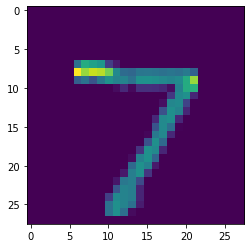

In [28]:
#Drawing
plt.imshow(x_test[0])
plt.show()

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)    #cmap with plt.cm.binary convert to B/W
#plt.show()
#print(x_train[0])


#print(x_train[-0]) #Just a multidimensional array